Matplotlib is building the font cache; this may take a moment.


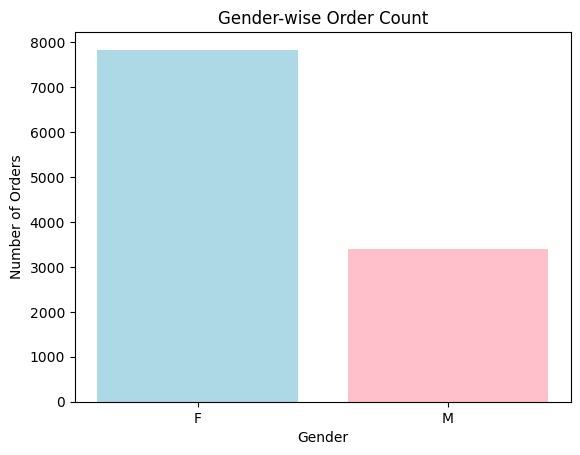

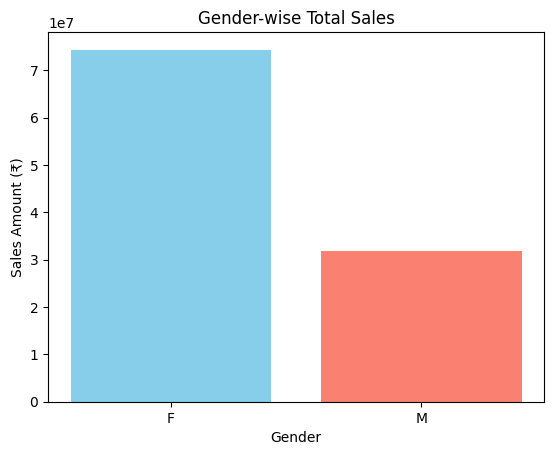

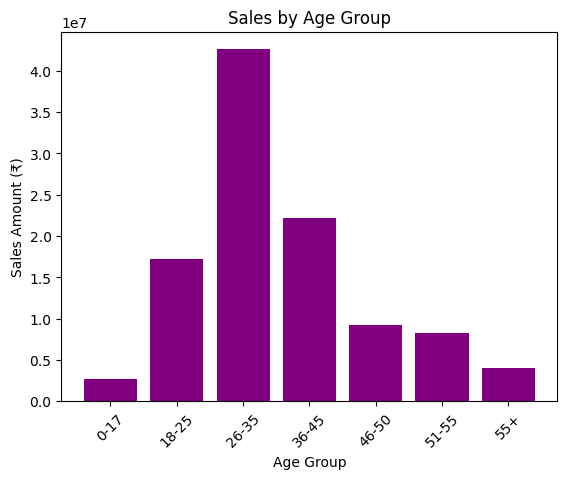

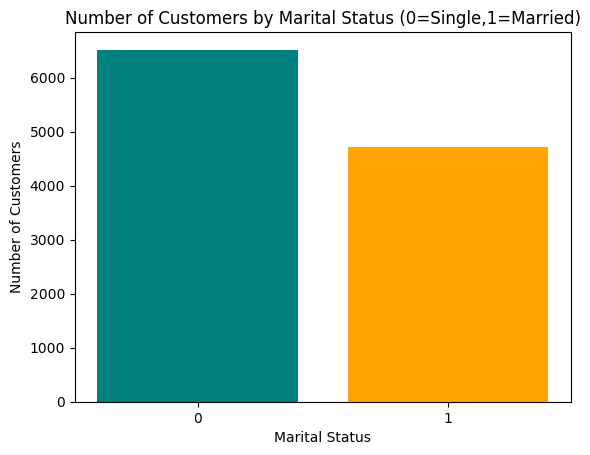

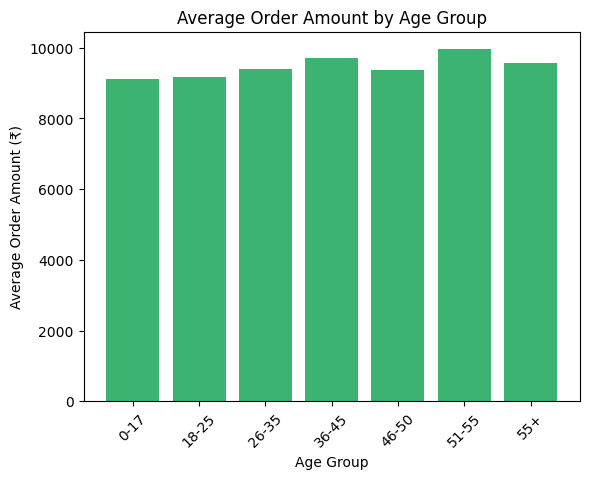

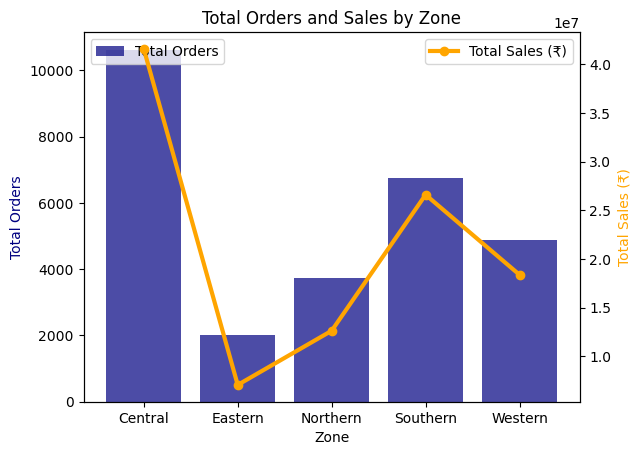

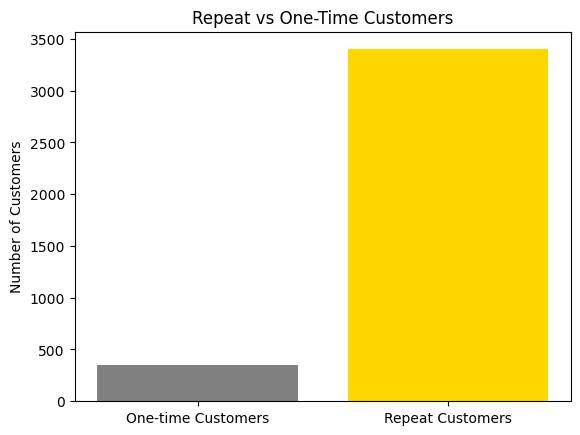

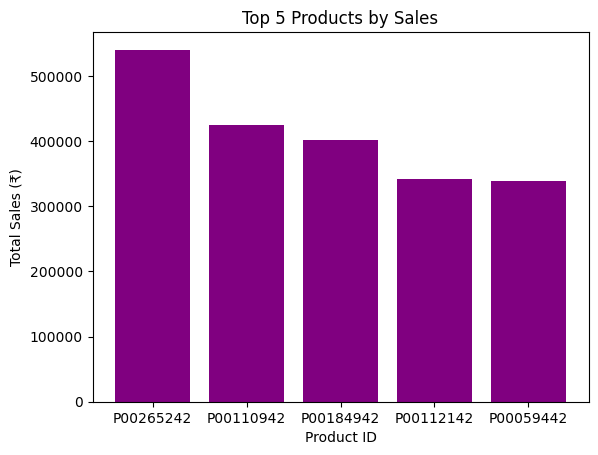

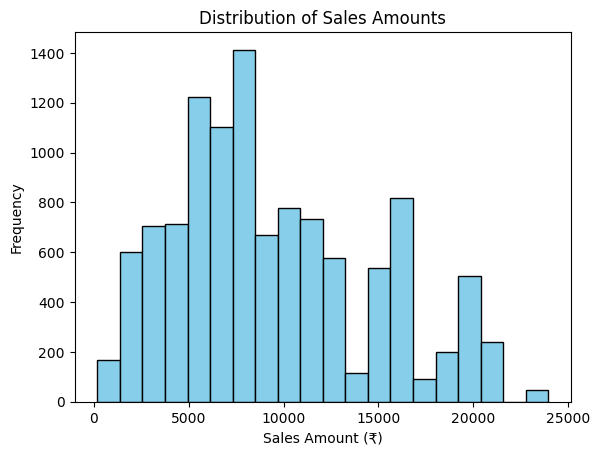

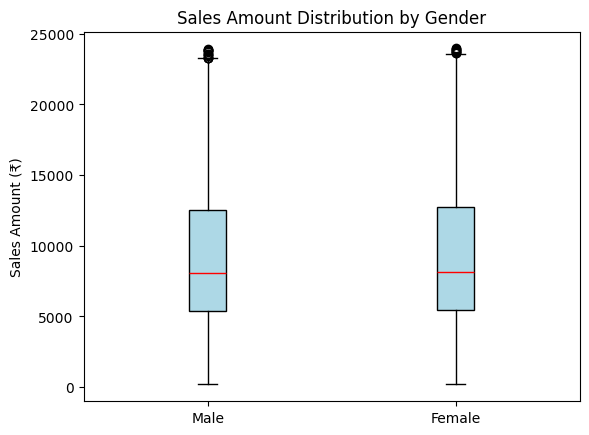

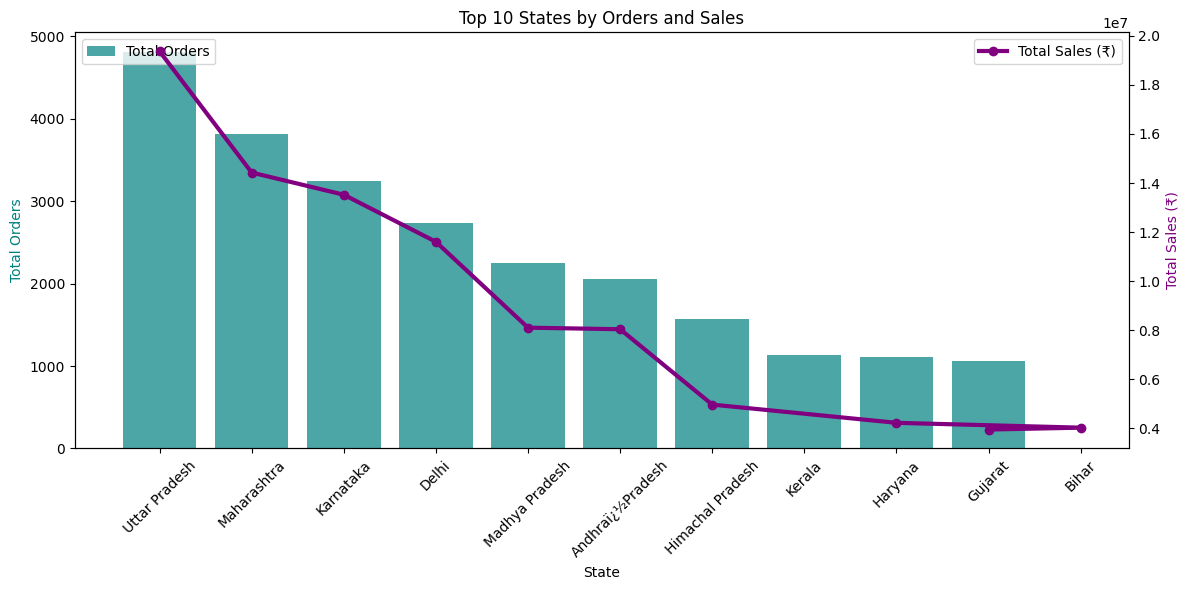

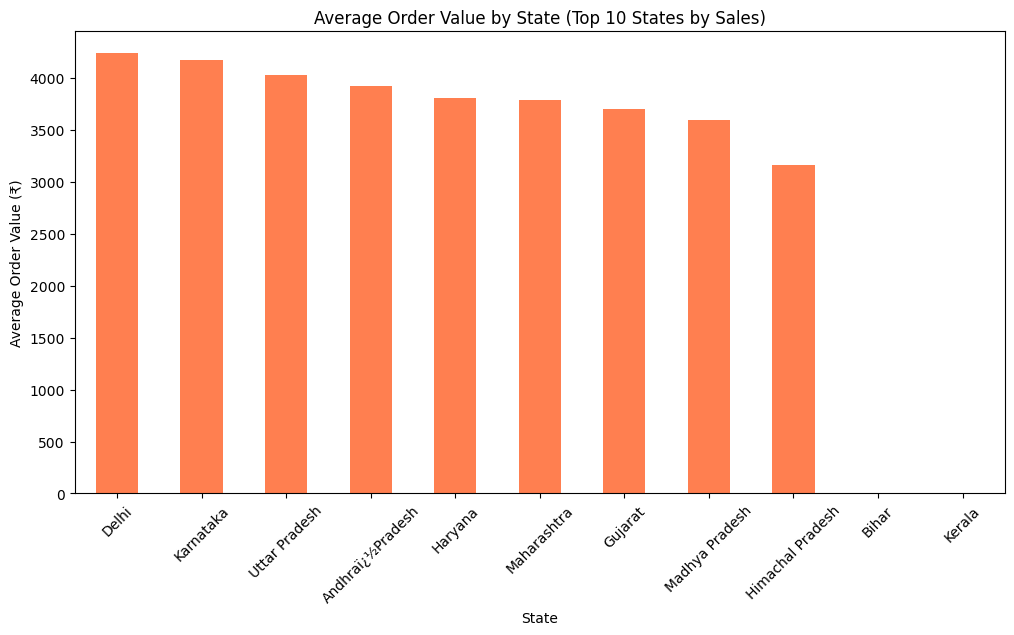

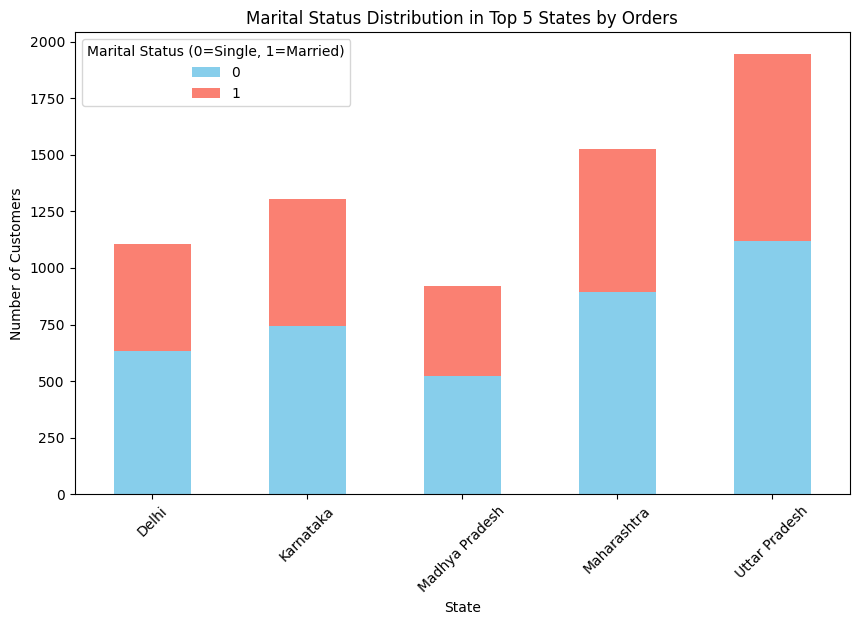

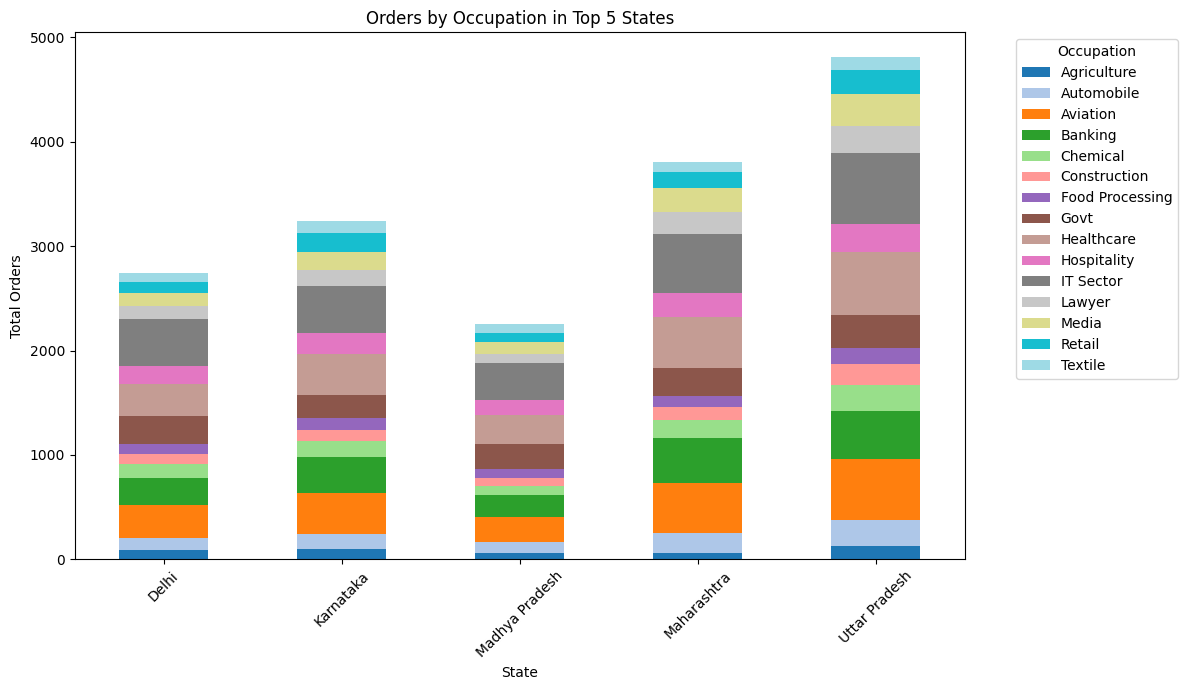

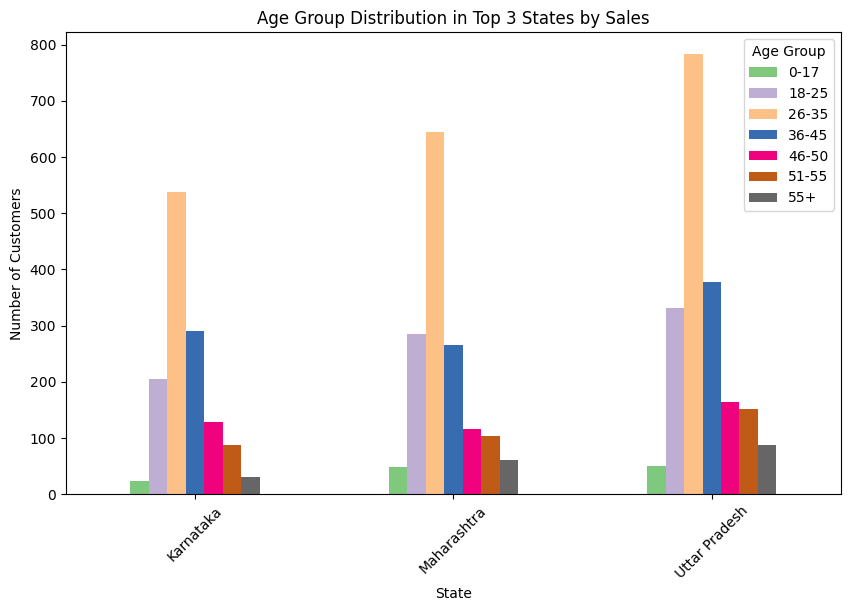

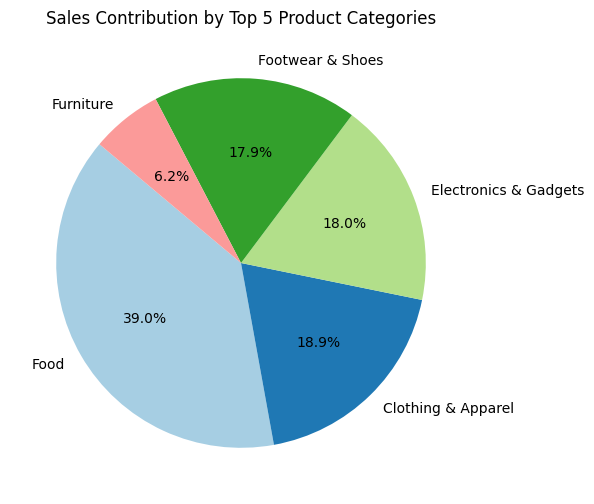

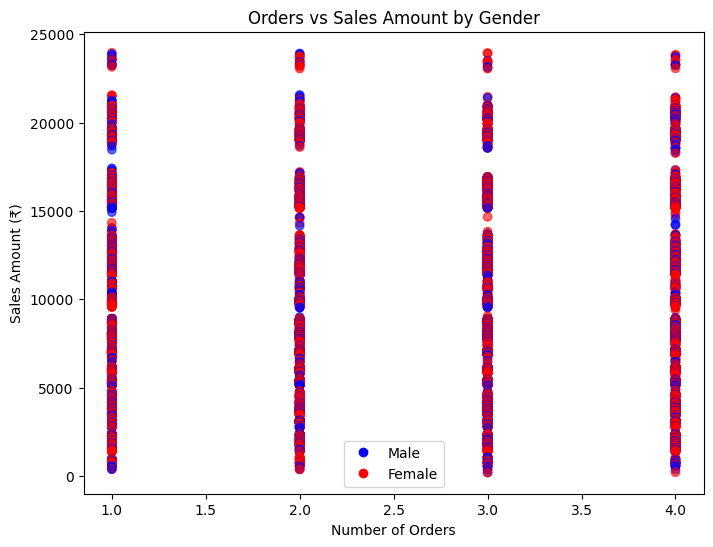

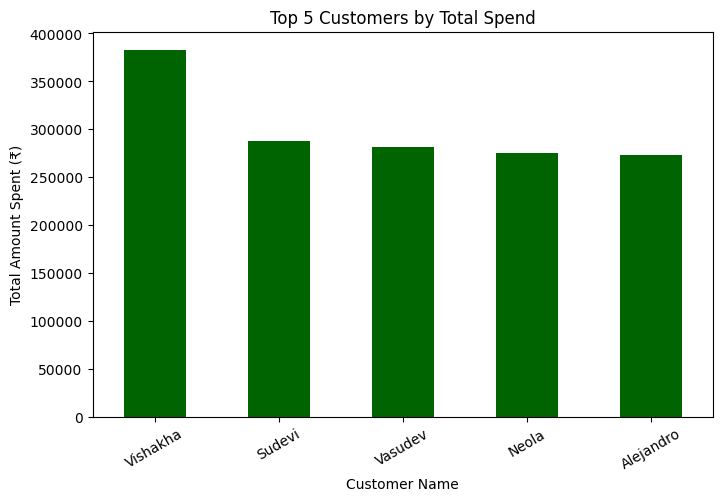

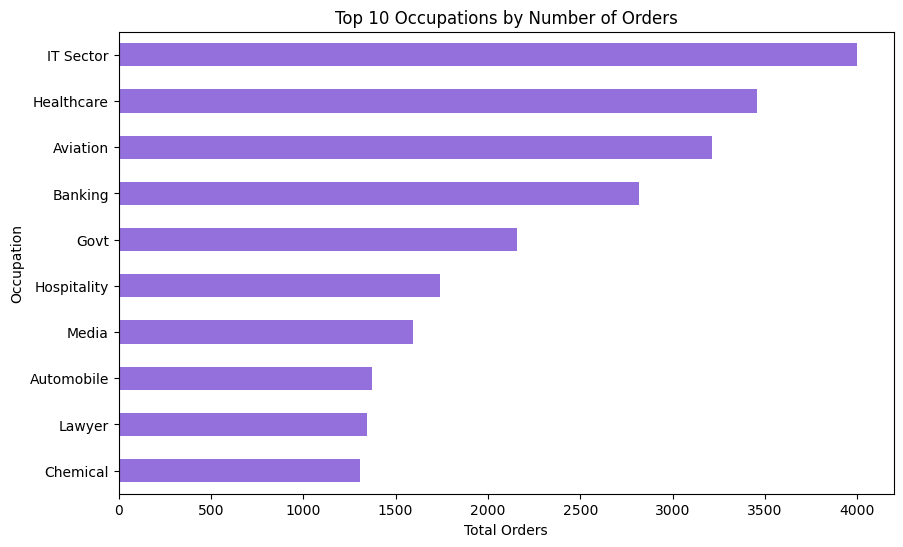

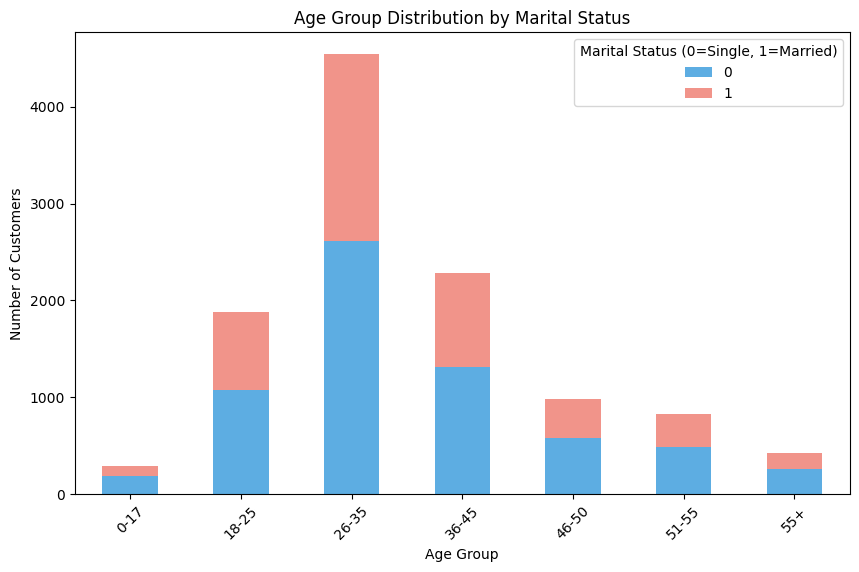

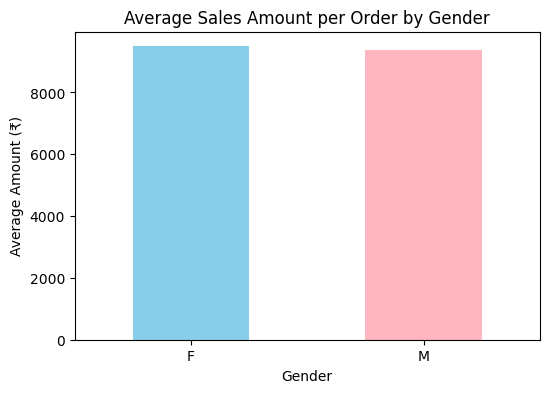

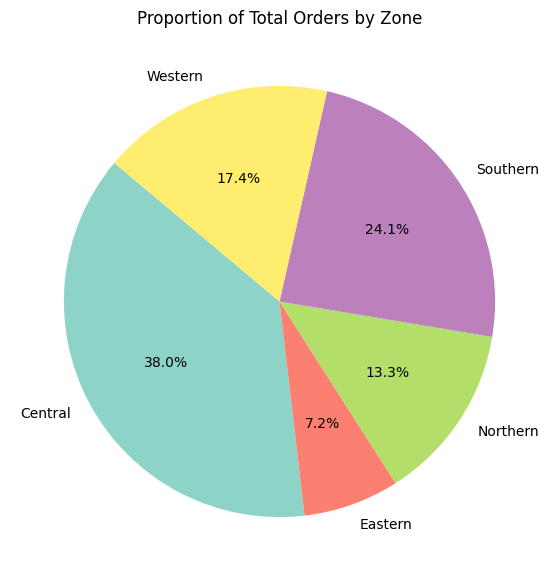

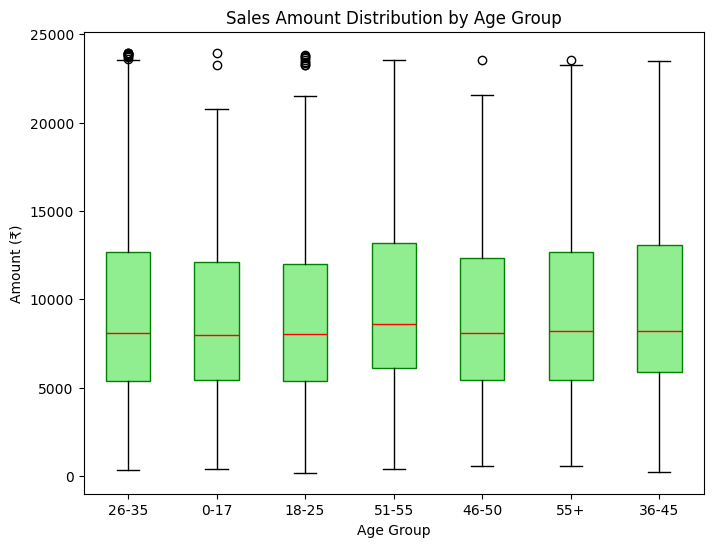

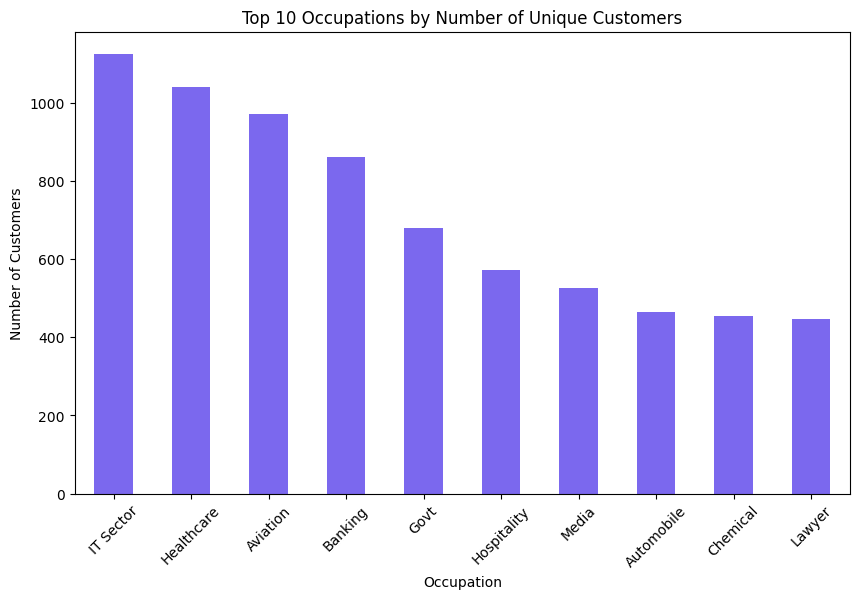

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('diwalisalesdata.csv', encoding='unicode_escape')

# Clean data
df.drop(columns=['Status', 'unnamed1'], inplace=True, errors='ignore')
df.dropna(inplace=True)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df = df[df['Amount'].notnull()]
df['State'] = df['State'].str.strip()

# === Basic Plots ===

# Gender-wise Order Count
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'pink'])
plt.title('Gender-wise Order Count')
plt.xlabel('Gender')
plt.ylabel('Number of Orders')
plt.show()

# Gender-wise Sales
sales_by_gender = df.groupby('Gender')['Amount'].sum()
plt.bar(sales_by_gender.index, sales_by_gender.values, color=['skyblue', 'salmon'])
plt.title('Gender-wise Total Sales')
plt.xlabel('Gender')
plt.ylabel('Sales Amount (₹)')
plt.show()

# Age Group vs Sales
sales_by_age = df.groupby('Age Group')['Amount'].sum()
plt.bar(sales_by_age.index, sales_by_age.values, color='purple')
plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sales Amount (₹)')
plt.xticks(rotation=45)
plt.show()

# === Extended Analysis ===

# 1. Customer Segmentation by Marital Status
marital_counts = df['Marital_Status'].value_counts()
plt.bar(marital_counts.index.astype(str), marital_counts.values, color=['teal', 'orange'])
plt.title('Number of Customers by Marital Status (0=Single,1=Married)')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.show()

# 2. Average Order Amount by Age Group
avg_order_by_age = df.groupby('Age Group')['Amount'].mean()
plt.bar(avg_order_by_age.index, avg_order_by_age.values, color='mediumseagreen')
plt.title('Average Order Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Order Amount (₹)')
plt.xticks(rotation=45)
plt.show()

# 3. Total Orders and Total Sales by Zone
orders_by_zone = df.groupby('Zone')['Orders'].sum()
sales_by_zone = df.groupby('Zone')['Amount'].sum()

fig, ax1 = plt.subplots()

ax1.bar(orders_by_zone.index, orders_by_zone.values, alpha=0.7, label='Total Orders', color='navy')
ax1.set_ylabel('Total Orders', color='navy')

ax2 = ax1.twinx()
ax2.plot(sales_by_zone.index, sales_by_zone.values, color='orange', marker='o', linewidth=3, label='Total Sales (₹)')
ax2.set_ylabel('Total Sales (₹)', color='orange')

plt.title('Total Orders and Sales by Zone')
ax1.set_xlabel('Zone')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# 4. Repeat Customers Analysis
orders_per_customer = df.groupby('User_ID')['Orders'].sum()
repeat_customers = orders_per_customer[orders_per_customer > 1]
one_time_customers = orders_per_customer[orders_per_customer == 1]

plt.bar(['One-time Customers', 'Repeat Customers'], [len(one_time_customers), len(repeat_customers)], color=['gray', 'gold'])
plt.title('Repeat vs One-Time Customers')
plt.ylabel('Number of Customers')
plt.show()

# 5. Top 5 Products by Total Sales
product_sales = df.groupby('Product_ID')['Amount'].sum().sort_values(ascending=False).head(5)
plt.bar(product_sales.index, product_sales.values, color='purple')
plt.title('Top 5 Products by Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales (₹)')
plt.show()

# 6. Sales Distribution Histogram
plt.hist(df['Amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales Amounts')
plt.xlabel('Sales Amount (₹)')
plt.ylabel('Frequency')
plt.show()

# 7. Boxplot of Sales Amount by Gender (matplotlib)
male_sales = df[df['Gender'] == 'M']['Amount']
female_sales = df[df['Gender'] == 'F']['Amount']

plt.boxplot([male_sales, female_sales], labels=['Male', 'Female'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
plt.title('Sales Amount Distribution by Gender')
plt.ylabel('Sales Amount (₹)')
plt.show()

# 8. Total Orders and Total Sales by State
orders_by_state = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)
sales_by_state = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(orders_by_state.index, orders_by_state.values, alpha=0.7, label='Total Orders', color='teal')
ax1.set_ylabel('Total Orders', color='teal')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(sales_by_state.index, sales_by_state.values, color='purple', marker='o', linewidth=3, label='Total Sales (₹)')
ax2.set_ylabel('Total Sales (₹)', color='purple')

plt.title('Top 10 States by Orders and Sales')
ax1.set_xlabel('State')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 9. Average Order Value by State (Top 10 States by Sales)
avg_order_value_state = (sales_by_state / orders_by_state).sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_order_value_state.plot(kind='bar', color='coral')
plt.title('Average Order Value by State (Top 10 States by Sales)')
plt.xlabel('State')
plt.ylabel('Average Order Value (₹)')
plt.xticks(rotation=45)
plt.show()


# 10. Marital Status Distribution by State (Top 5 States by Orders)

top_states = orders_by_state.index[:5]
marital_state = df[df['State'].isin(top_states)].groupby(['State', 'Marital_Status']).size().unstack(fill_value=0)

marital_state.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Marital Status Distribution in Top 5 States by Orders')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Marital Status (0=Single, 1=Married)')
plt.show()


# 11. Orders by Occupation in Top 5 States

occupation_state = df[df['State'].isin(top_states)].groupby(['State', 'Occupation'])['Orders'].sum().unstack(fill_value=0)

occupation_state.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')
plt.title('Orders by Occupation in Top 5 States')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 12. Age Distribution in Top 3 States by Sales

top3_states = sales_by_state.index[:3]
age_state = df[df['State'].isin(top3_states)].groupby(['State', 'Age Group']).size().unstack(fill_value=0)

age_state.plot(kind='bar', stacked=False, figsize=(10,6), colormap='Accent')
plt.title('Age Group Distribution in Top 3 States by Sales')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

# 13. Product Category Sales Contribution (Top 5 Categories)
category_sales = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sales Contribution by Top 5 Product Categories')
plt.ylabel('')
plt.show()


# 14. Orders vs Amount Scatter Plot with Gender Coloring
colors = {'M':'blue', 'F':'red'}
plt.figure(figsize=(8,6))
plt.scatter(df['Orders'], df['Amount'], c=df['Gender'].map(colors), alpha=0.6)
plt.title('Orders vs Sales Amount by Gender')
plt.xlabel('Number of Orders')
plt.ylabel('Sales Amount (₹)')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='blue', markersize=8),
                    plt.Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='red', markersize=8)])
plt.show()


# 15. Top 5 Customers by Total Spend
top_customers = df.groupby('Cust_name')['Amount'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top_customers.plot(kind='bar', color='darkgreen')
plt.title('Top 5 Customers by Total Spend')
plt.xlabel('Customer Name')
plt.ylabel('Total Amount Spent (₹)')
plt.xticks(rotation=30)
plt.show()


# 16. Orders by Occupation (Top 10 Occupations)
orders_by_occupation = df.groupby('Occupation')['Orders'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
orders_by_occupation.plot(kind='barh', color='mediumpurple')
plt.title('Top 10 Occupations by Number of Orders')
plt.xlabel('Total Orders')
plt.ylabel('Occupation')
plt.gca().invert_yaxis()
plt.show()


# 17. Age Distribution by Marital Status (Stacked Bar)
age_marital = df.groupby(['Age Group', 'Marital_Status']).size().unstack(fill_value=0)

age_marital.plot(kind='bar', stacked=True, figsize=(10,6), color=['#5DADE2', '#F1948A'])
plt.title('Age Group Distribution by Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Marital Status (0=Single, 1=Married)')
plt.show()




# 19. Average Amount per Order by Gender
avg_amount_gender = df.groupby('Gender')['Amount'].mean()

plt.figure(figsize=(6,4))
avg_amount_gender.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Average Sales Amount per Order by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Amount (₹)')
plt.xticks(rotation=0)
plt.show()


# 20. Total Orders by Zone (Pie Chart)
zone_orders = df.groupby('Zone')['Orders'].sum()

plt.figure(figsize=(7,7))
zone_orders.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Proportion of Total Orders by Zone')
plt.ylabel('')
plt.show()


# 21. Boxplot of Amount by Age Group (using matplotlib)
fig, ax = plt.subplots(figsize=(8,6))
age_groups = df['Age Group'].unique()
data_to_plot = [df.loc[df['Age Group'] == age, 'Amount'].dropna() for age in age_groups]

ax.boxplot(data_to_plot, labels=age_groups, patch_artist=True,
           boxprops=dict(facecolor='lightgreen', color='green'),
           medianprops=dict(color='red'))
ax.set_title('Sales Amount Distribution by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Amount (₹)')
plt.show()


# 22. Number of Customers per Occupation
customers_per_occupation = df.groupby('Occupation')['User_ID'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
customers_per_occupation.plot(kind='bar', color='mediumslateblue')
plt.title('Top 10 Occupations by Number of Unique Customers')
plt.xlabel('Occupation')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()